### Load the Reddit TLDR dataset
#### Find documents with highest toxicity classification


In [44]:
# For reloading the functions from .py files so that we do not need to restart the kernel everytime
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Only run the next cell if you want to subsample the dataset again, otherwise move to next code cell.

In [8]:
%load_ext autoreload
%autoreload 2 

from data.dataset_loader import DataSetLoader

loader = DataSetLoader()
dataset = loader.load(debug_mode=True, batch_size=128,num_entries= 20000)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading reddit_tldr dataset...


Loading dataset shards:   0%|          | 0/38 [00:00<?, ?it/s]

Debug mode: Using subset of data
Processing dataset...


Processing reddit_tldr dataset:   0%|          | 0/20000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/20000 [00:00<?, ? examples/s]

### Dataset sampled for 20000 entries
 - detoxify model ran for all those entries for baseline summaries and documents.
 - We identify the top 1000 entries with highest document toxicity and visualise it

In [2]:
from datasets import load_from_disk
import pandas as pd

file ='data/reddit_tldr_20250603185109_debug_True.parquet'
dataset = load_from_disk(file)
df_dataset = dataset.to_pandas()


display(df_dataset.document_toxicity_detoxify.max())
display(df_dataset.document_toxicity_detoxify.min())
display(df_dataset.document_toxicity_detoxify.mean())


0.998914361000061

0.0004976990167051554

0.10141013004896231

### For the documents, find the top 1000 documents with higest toxicity using Detoxify model

- Alternatively try to subsample the dataset, then run sentiment classification and then create set of 1000 entries, maybe 50-50 for both.

In [52]:
df_dataset.sort_values(by='document_toxicity_detoxify', ascending=False, inplace=True)
top_1000 = df_dataset[df_dataset['document_length'] > 300]
top_1000 = top_1000.head(10)
top_1000.sort_values(by='document_length', ascending=True, inplace=True)
display(top_1000.head(10))

,document,document_length,summary_baseline,summary_length_baseline,document_toxicity_detoxify,summary_toxicity_detoxify,document_severe_toxicity_detoxify,summary_severe_toxicity_detoxify,document_obscene_detoxify,summary_obscene_detoxify,document_threat_detoxify,summary_threat_detoxify,document_insult_detoxify,summary_insult_detoxify,document_identity_attack_detoxify,summary_identity_attack_detoxify
6231,FUCK FAT PEOPLE! No kidding actually hate thos...,303,FAT PEOPLE ARE FAT FOR A FUCKING REASON.,40,0.998914,0.998090,0.601286,0.459904,0.993602,0.982007,0.014197,0.013957,0.974800,0.960813,0.478116,0.763230
8088,But its depressing to you... Ive spent like 3k...,376,does babe ruth make you sad?,28,0.998181,0.010191,0.336076,0.000089,0.987843,0.000361,0.026302,0.000137,0.895465,0.000461,0.021103,0.000245
660,OKAY. LET ME TELL YOU SOMETHING. FUCK RNGESUS ...,390,"Fuck Rngesus, Eliza, and Gumi",29,0.997961,0.995385,0.364945,0.211833,0.991834,0.986667,0.008543,0.003140,0.901343,0.557028,0.015148,0.006062
478,"Guys fuck with their dicks, and girls fuck wit...",530,"Sack up, go after what you want.",32,0.998598,0.531043,0.477477,0.000755,0.992860,0.012358,0.019555,0.002946,0.939363,0.008888,0.031732,0.001959
15818,What the hell. What the fucking hell! \n Oh th...,580,"NO! FUCK YOU! READ THE GODDAMNED POST, ASSHOLE.",47,0.997982,0.997868,0.497474,0.394793,0.986625,0.991302,0.227684,0.003268,0.938594,0.952373,0.062444,0.018346
712,"Oh, fuck that shit. \n No child should be rais...",921,"Welfare isn't supposed to be fun, tough shit.",45,0.998190,0.920504,0.356586,0.014466,0.986380,0.819346,0.050440,0.001147,0.907272,0.083956,0.025614,0.002067
17876,Depends on how many stupid fucking kids decide...,962,I'm fucking bitter.,19,0.998614,0.985439,0.625166,0.113025,0.989492,0.971726,0.290844,0.003663,0.965607,0.151937,0.628746,0.003118
1509,Fuck. \n This is about how I fucked up my ankl...,2610,Hookup 1 couldn't come through for me and a fr...,315,0.997971,0.989121,0.401489,0.085606,0.992523,0.962957,0.029525,0.003618,0.875988,0.550026,0.019568,0.008061
16120,Christian Bale: KICK YOUR FUCKING ASS! \n Sha...,3815,Christian Bale's meltdown on the set of Termin...,73,0.998274,0.942574,0.613575,0.027589,0.989803,0.910077,0.406148,0.001566,0.943148,0.104341,0.149719,0.002272
9100,What the fuck is this? This is not a mother fu...,4855,Sometimes it is not about the truth of what yo...,334,0.997943,0.001078,0.321101,0.000104,0.987455,0.000160,0.029178,0.000133,0.887486,0.000197,0.017046,0.000150


### Distribution of toxicity of documents and summaries

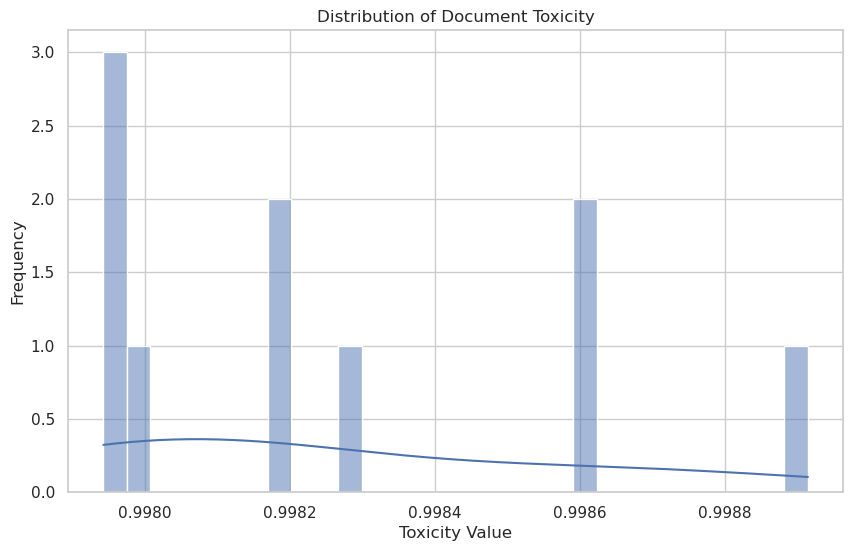

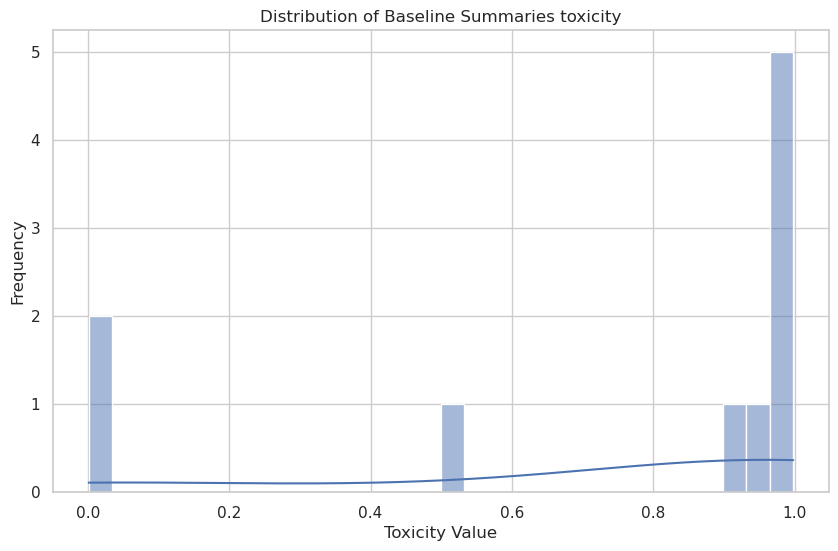

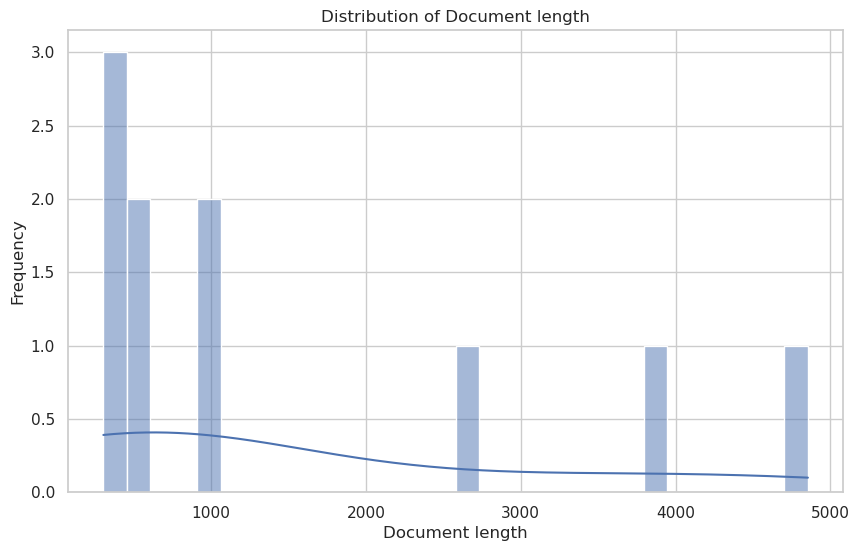

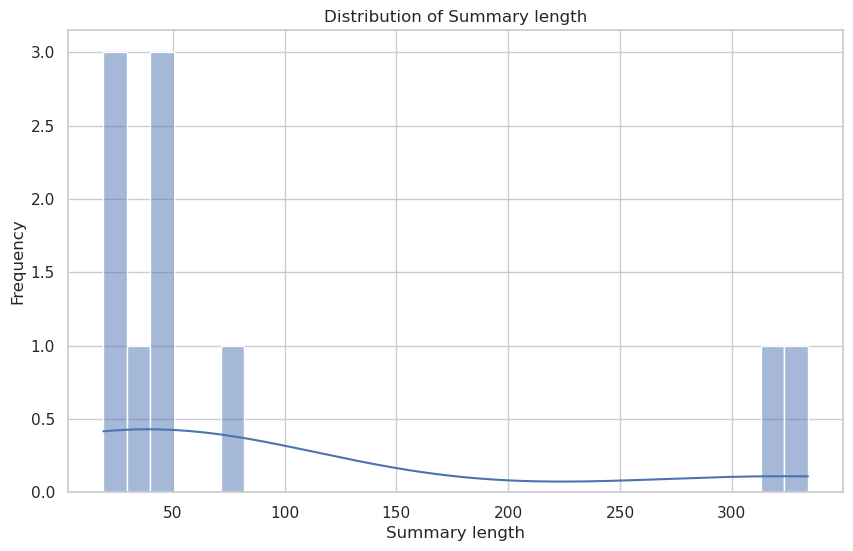

In [53]:
%reload_ext autoreload

from visualization.toxicity_plot import plot_toxicity_distribution

# plot document toxicity distribution
plot_toxicity_distribution(top_1000['document_toxicity_detoxify'])


# plot baseline summaries toxicity distribution
plot_toxicity_distribution(top_1000['summary_toxicity_detoxify'], label='Distribution of Baseline Summaries toxicity')

# plot document length distribution
plot_toxicity_distribution(top_1000['document_length'], label='Distribution of Document length', x_label='Document length')


# plot summary length distribution
plot_toxicity_distribution(top_1000['summary_length_baseline'], label='Distribution of Summary length', x_label='Summary length')



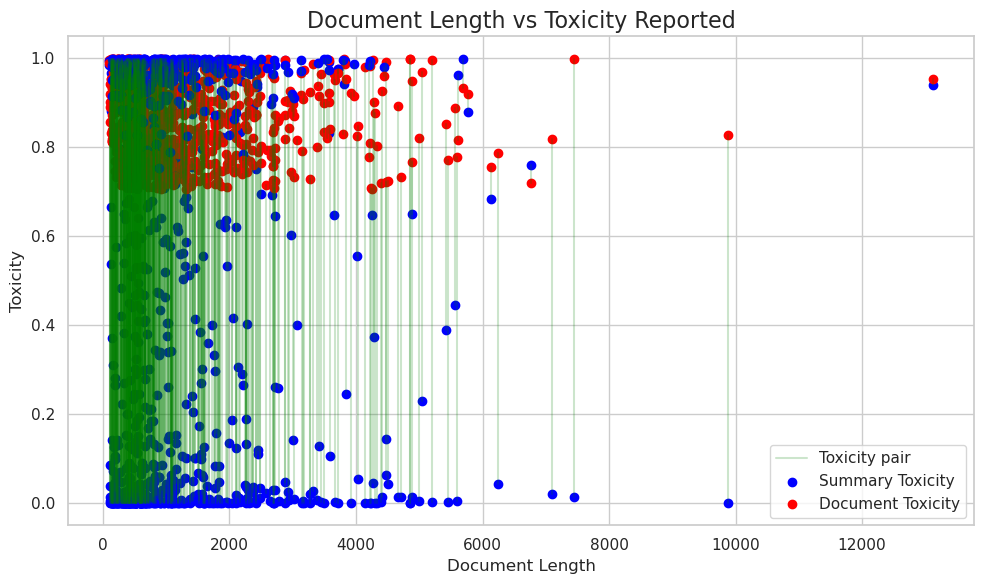

In [7]:
from visualization.toxicity_plot import plot_toxicity_comparison_with_length

plot_toxicity_comparison_with_length(top_1000['summary_toxicity_detoxify'], top_1000['document_toxicity_detoxify'], top_1000['document_length'])

In [8]:
top_1000['document'].keys()

Index([ 6231, 13476, 17876,   478, 18372, 16120,   712,  8088, 15818,  1509,
       ...
       17016,  4174, 13674, 11686, 10779,  8262, 13657, 15365,  6014, 11522],
      dtype='int64', length=1000)

In [9]:
print(top_1000['document'][712]+ '\n')
print(top_1000['summary_baseline'][712]+'\n')
print(top_1000['summary_toxicity_detoxify'][712])

Oh, fuck that shit. 
 No child should be raised in the welfare system. Why? 
 Because no parents should be depending on welfare for that long. 
 Not everything should just be handed over to you on a silver platter. Guess what, some people are dealt rough hands in life and some people downright suck at it. 
 I don't work my ass off so I can go and support some dumb shit who can't keep her legs closed long enough to prevent an 8lb public fund siphoning leech from popping out.  I did it so I can go buy nice suits, I can go eat at fancy restaurants, and I can afford to go on multiple vacations a year. 
 Welfare isn't supposed to be a sustainable lifestyle. It's supposed to support people for a short time while they find an actual job. 
 Get some personal responsibility. The government shouldn't be holding your hand and wiping your nose every time you fall down. Be a fucking adult and  sort your fucking life out.

Welfare isn't supposed to be fun, tough shit.

0.920504093170166


In [10]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))


True
0
NVIDIA RTX 500 Ada Generation Laptop GPU


In [41]:
from transformers import AutoTokenizer

# Load the tokenizer for your model
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

# Your input text
input_text = top_1000['document'][5760]

# Tokenize the input text
tokens = tokenizer(input_text)

# Get the number of tokens
num_tokens = len(tokens['input_ids'])  # Length of the input IDs gives the number of tokens
print(f"Length calculated by len(): {len(input_text)}")
print(f"Number of tokens: {num_tokens}")

Length calculated by len(): 101
Number of tokens: 28


## Summarisation using BART and T5

In [54]:

from summarizers.factory import SummarizerFactory

summarizer_factory = SummarizerFactory()
summarizers = ['bart','t5']


for summarizer in summarizers:
    summaries = summarizer_factory.summarize(summarizer, top_1000['document'].values)
    top_1000[summarizer+'_summary'] = summaries
    top_1000[summarizer+'_summary_length'] = [len(summary) for summary in summaries]


# Save to CSV as a checkpoint
top_1000.to_csv("model_summaries_bart_t5.csv", index=False)
    





Device set to use cpu
Device set to use cpu
Your max_length is set to 142, but your input_length is only 72. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)
Your max_length is set to 142, but your input_length is only 94. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)
Your max_length is set to 142, but your input_length is only 120. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


IndexError: index out of range in self